In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0934200701PNS003SRSPEC0003.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.318e-02 +/- 1.943e-03 (54.3 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-7
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 6558 sec
 Using fit statistic: chi
 Using Background File                P0934200701PNS003BGSPEC0003.FTZ
  Background Exposure Time: 6558 sec
 Using Response (RMF) File            epn_e3_ff20_sdY0.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0934200701PNS003SRCARF0003.FTZ



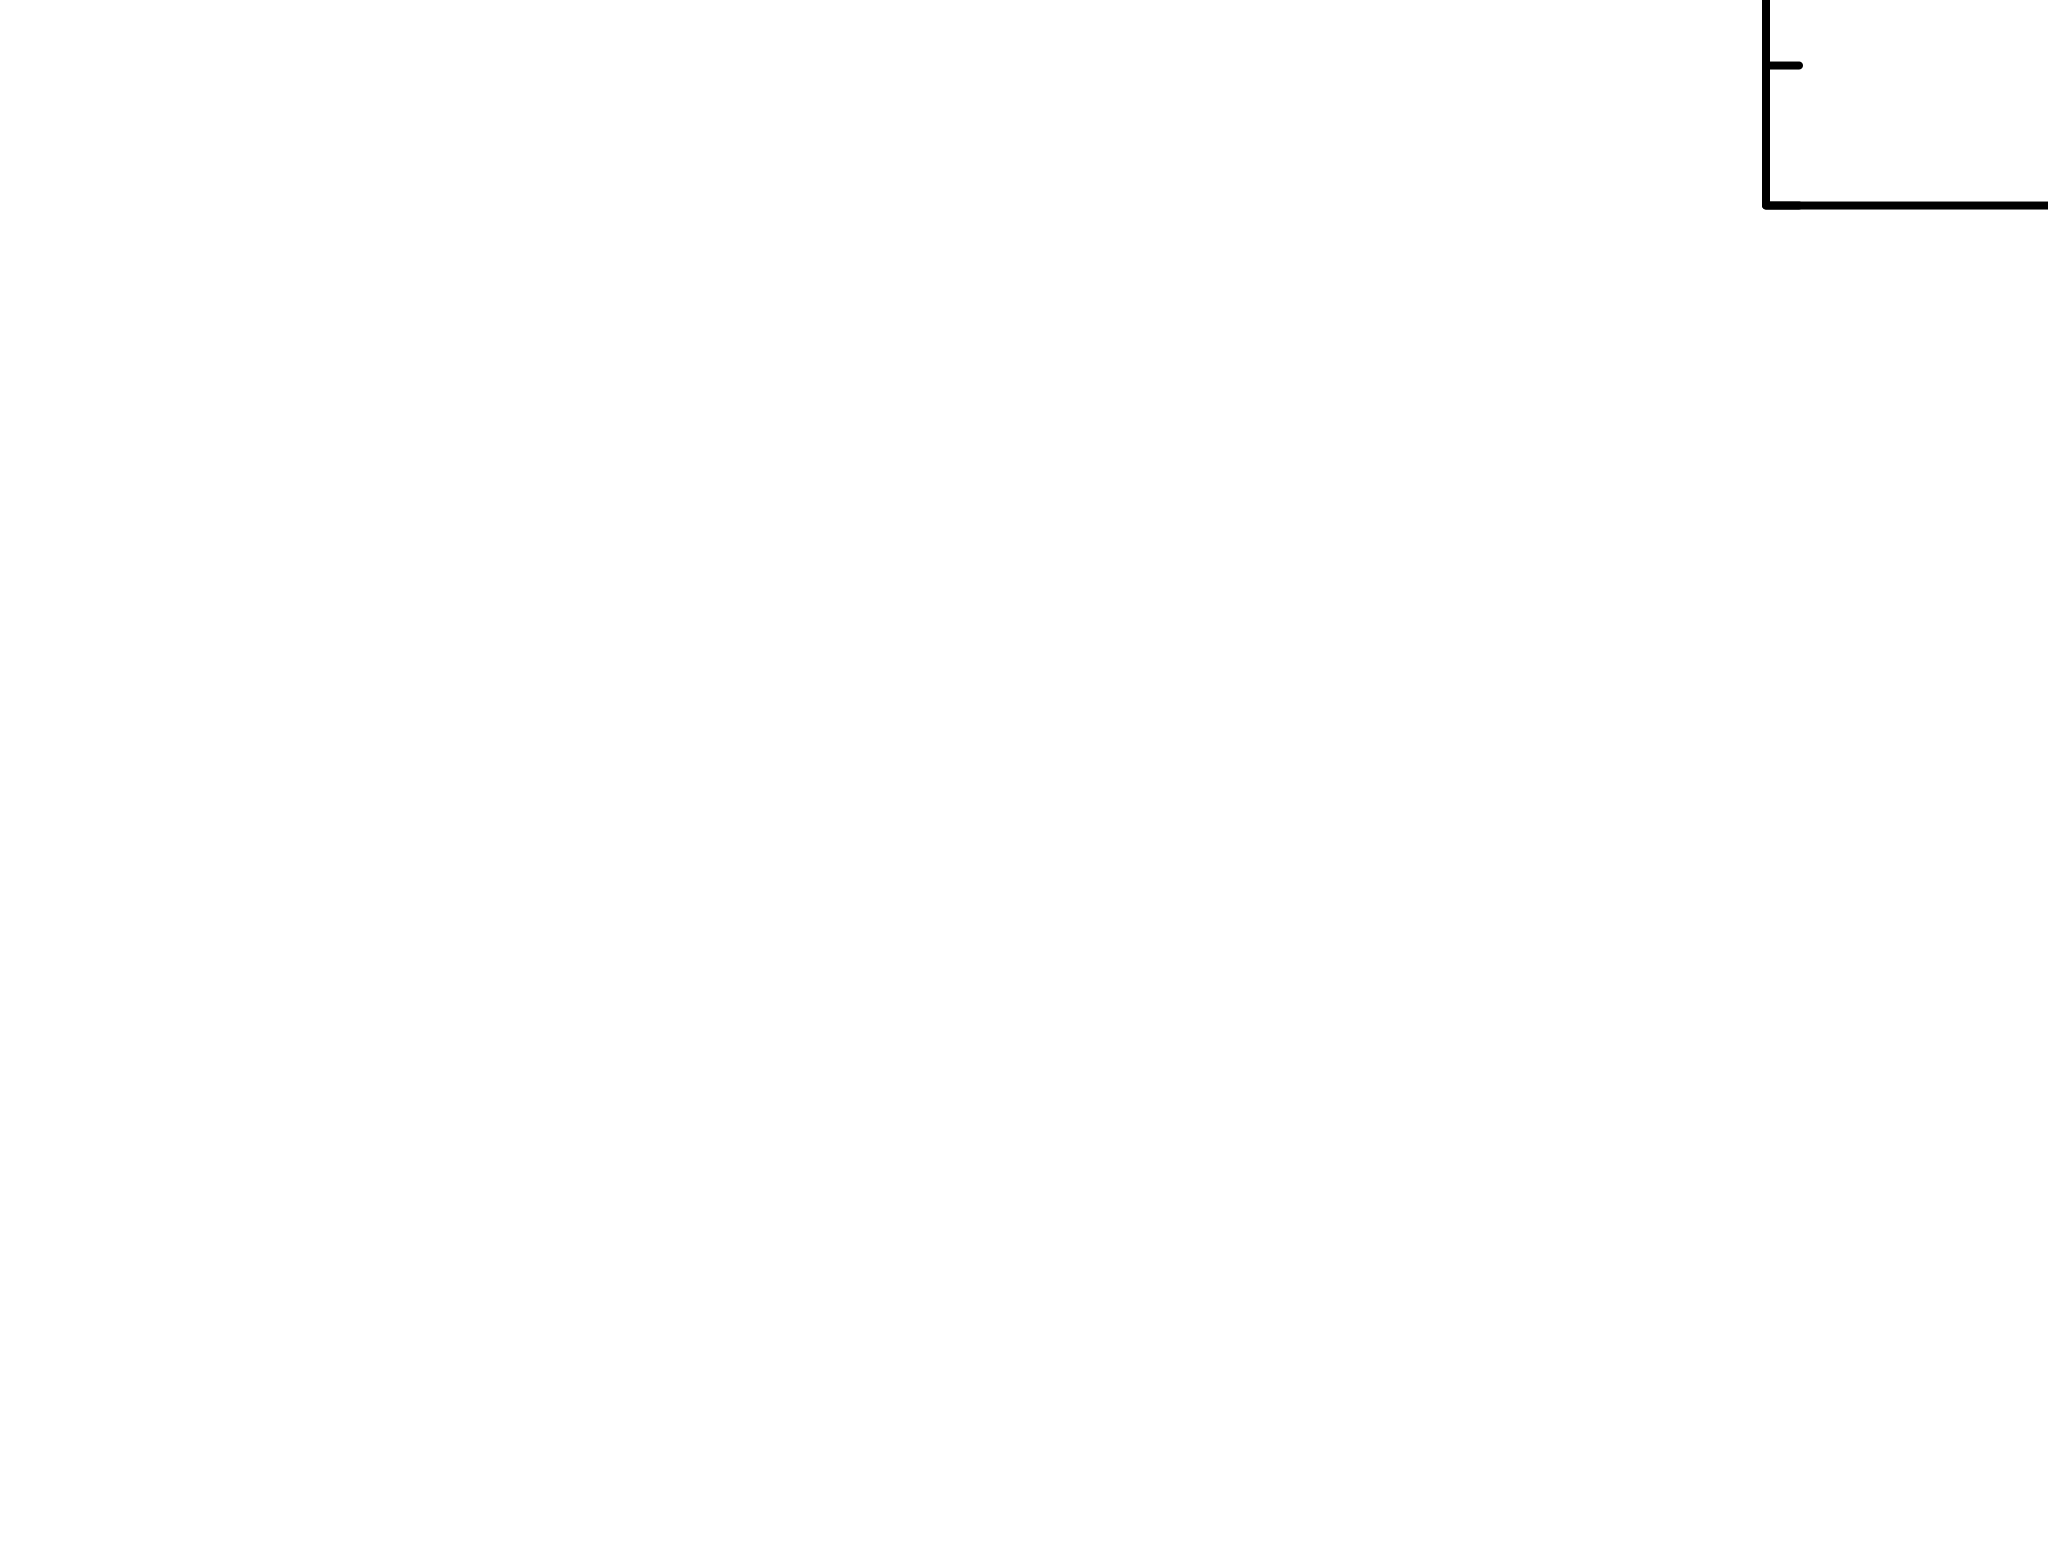

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00005 0.02")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (7) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner 

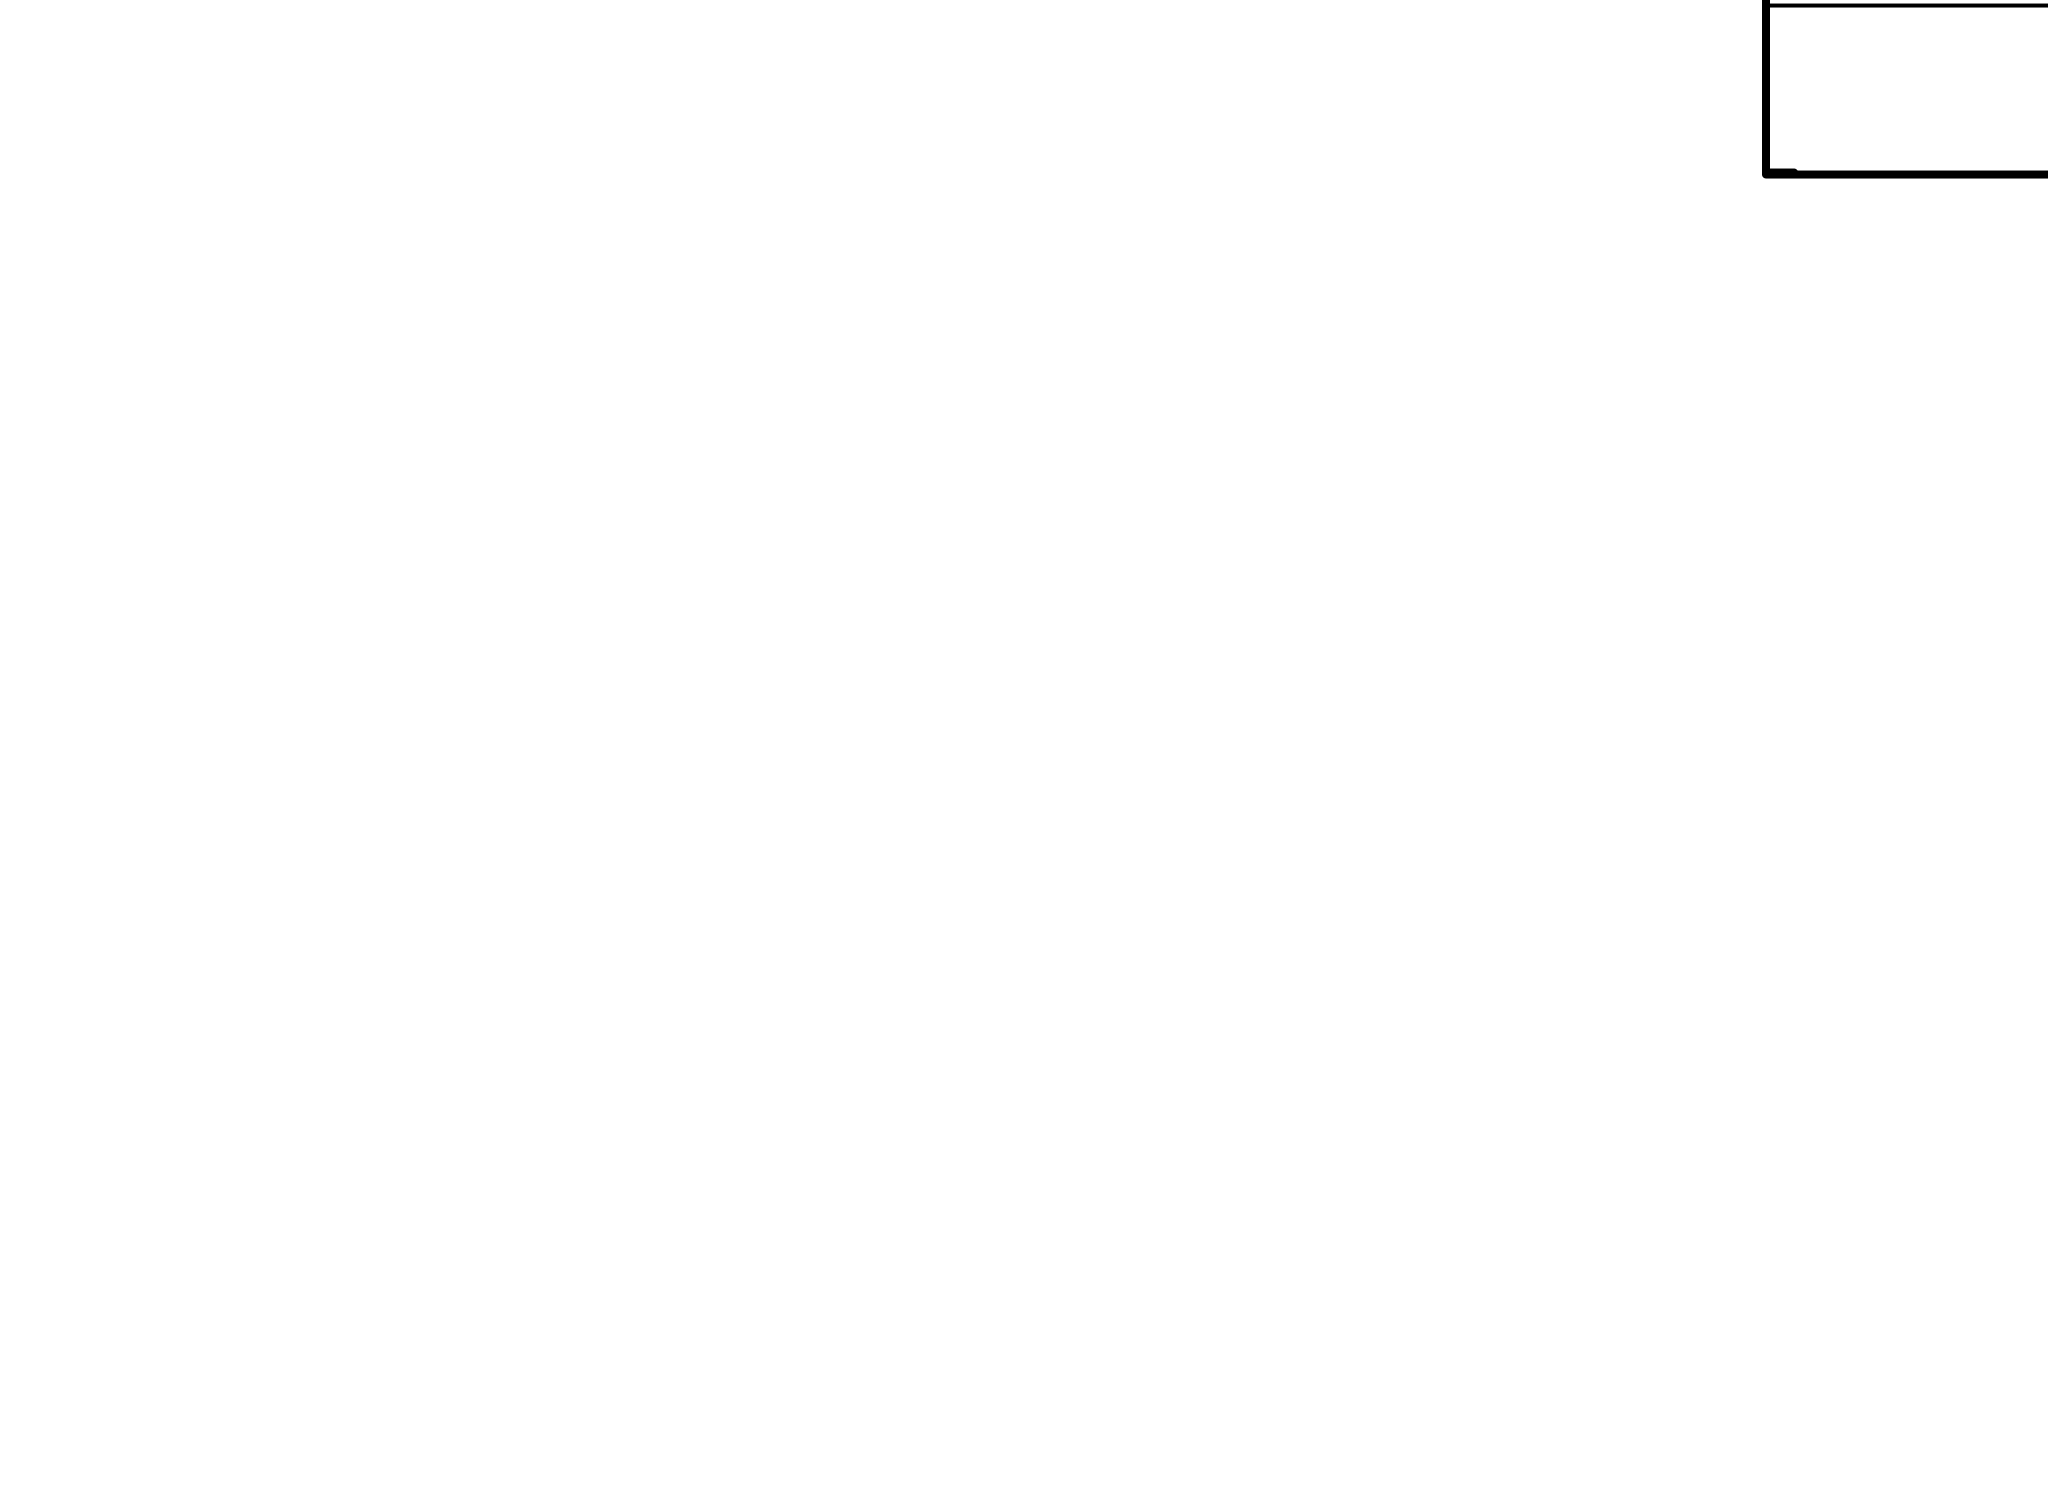

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

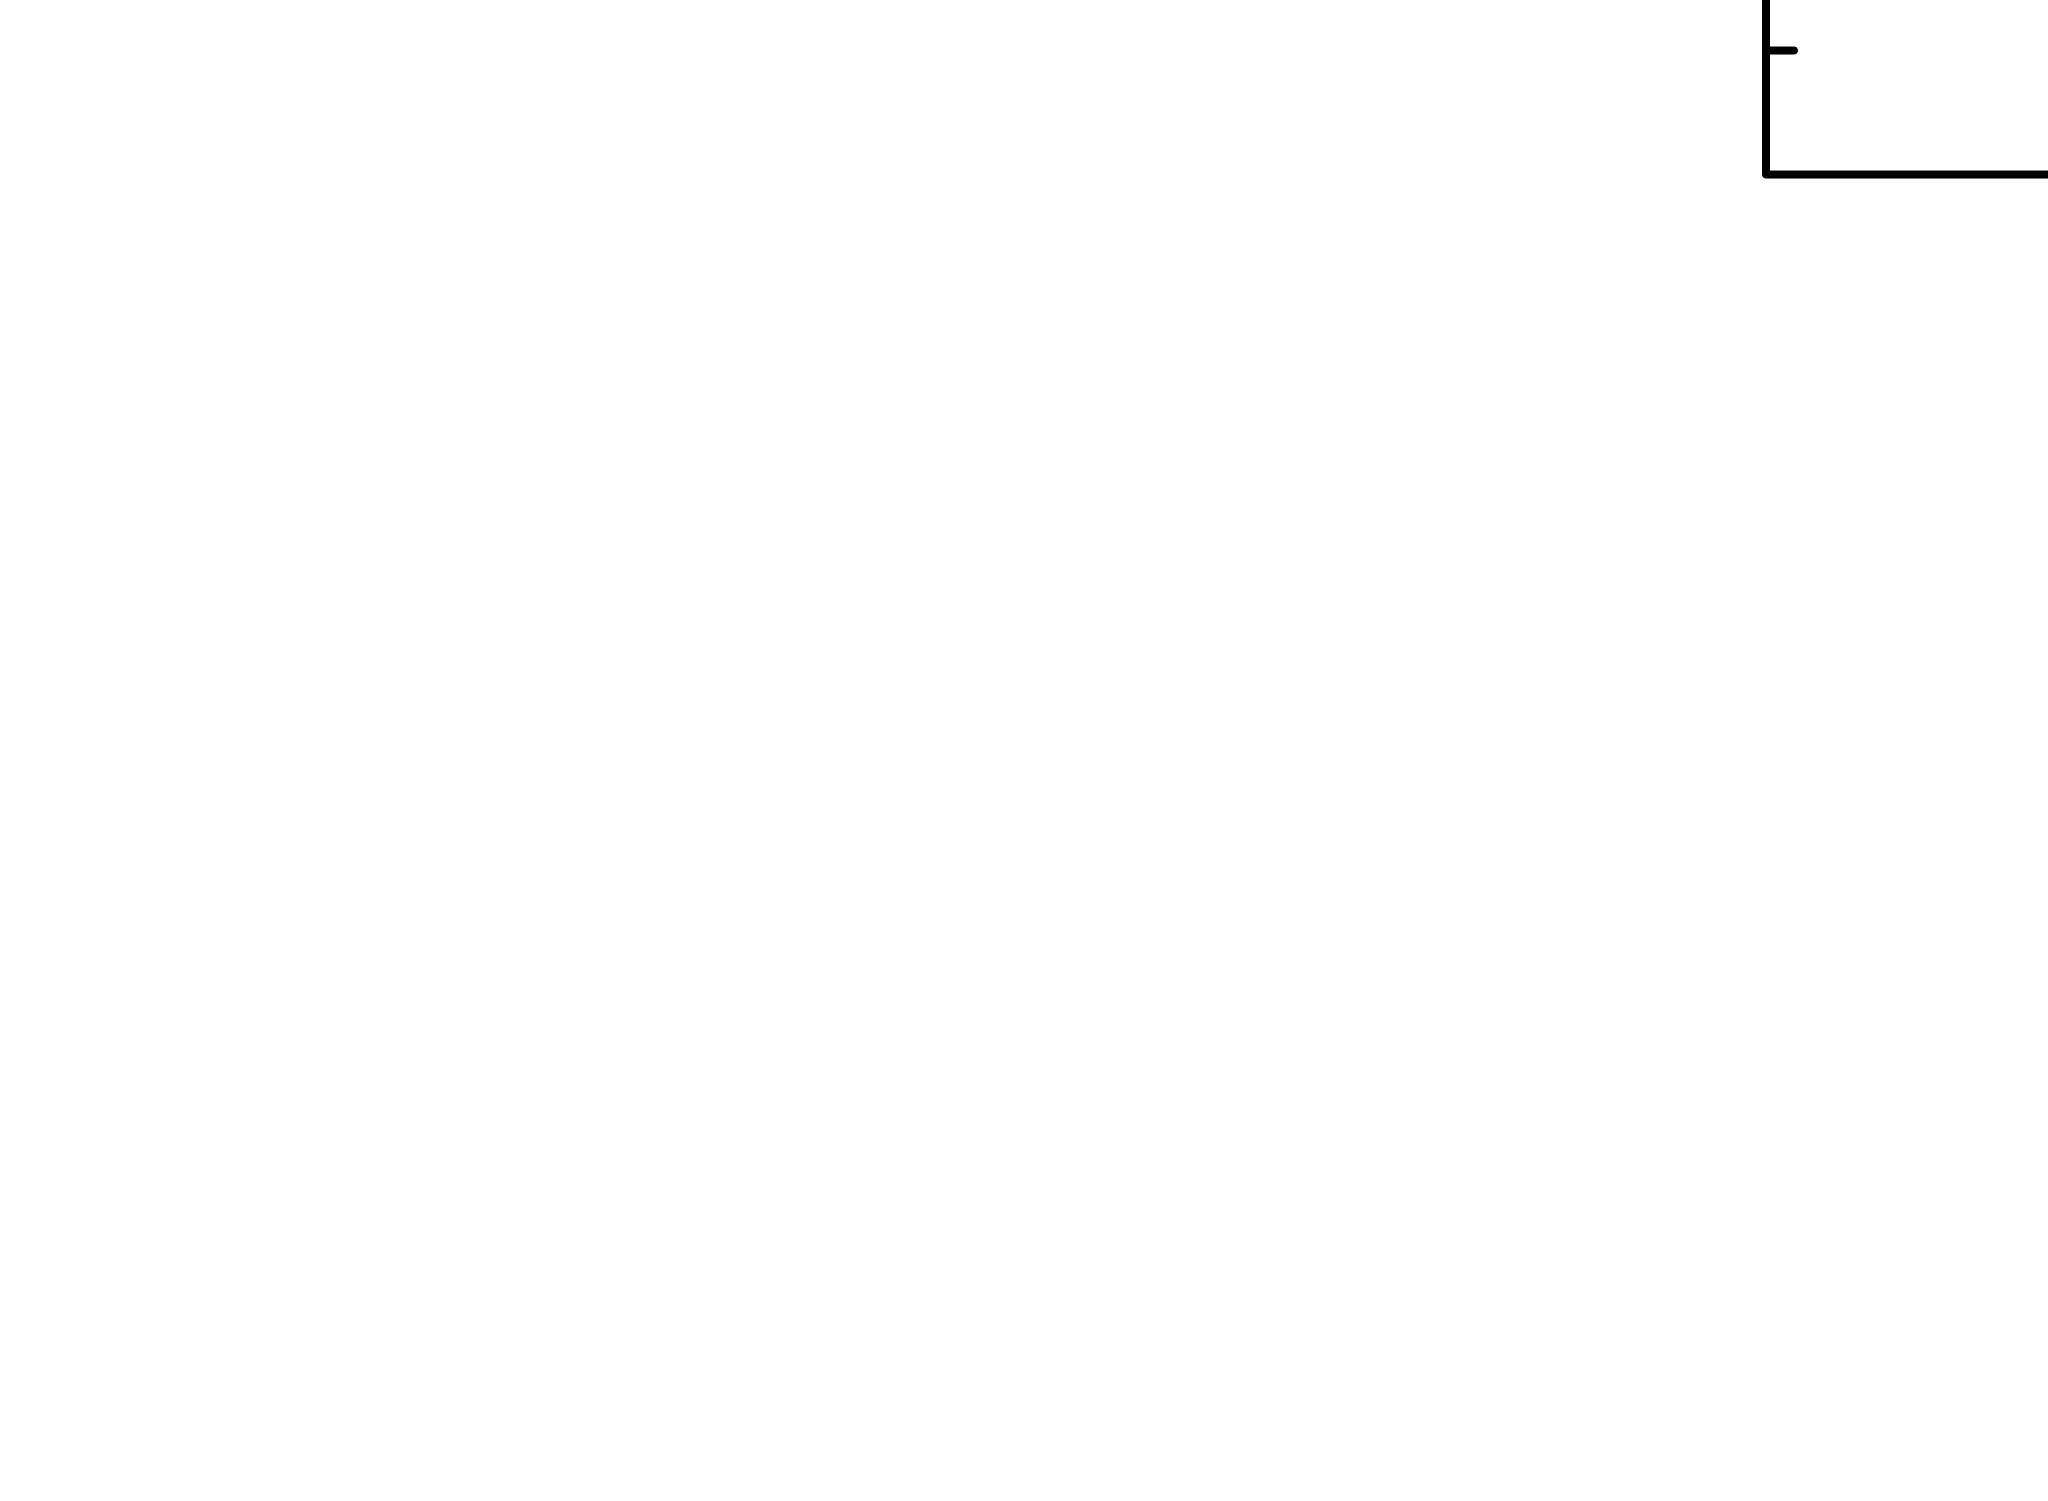


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.424306e+10     using 6 bins.

Test statistic : Chi-Squared              3.424306e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
16.0846      2.8911       -3      0.358486      0.544204   1.15488e-05
11.9346      177389       -4      0.404341       2.15319   3.50229e-05
4.98658      78336.6      -5      0.603246       1.76841   6.02064e-05
4

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.244778e+09     using 6 bins.

Test statistic : Chi-Squared              6.244778e+09     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
6.65644      1.91944      -1      0.336153       5.07481   5.82208e-05
4.545        38389.8      -2      0.445268       5.20794   6.04161e-05
4.49744      4409.17      -3      0.473614       5.13002   6.13214e-05
4.4

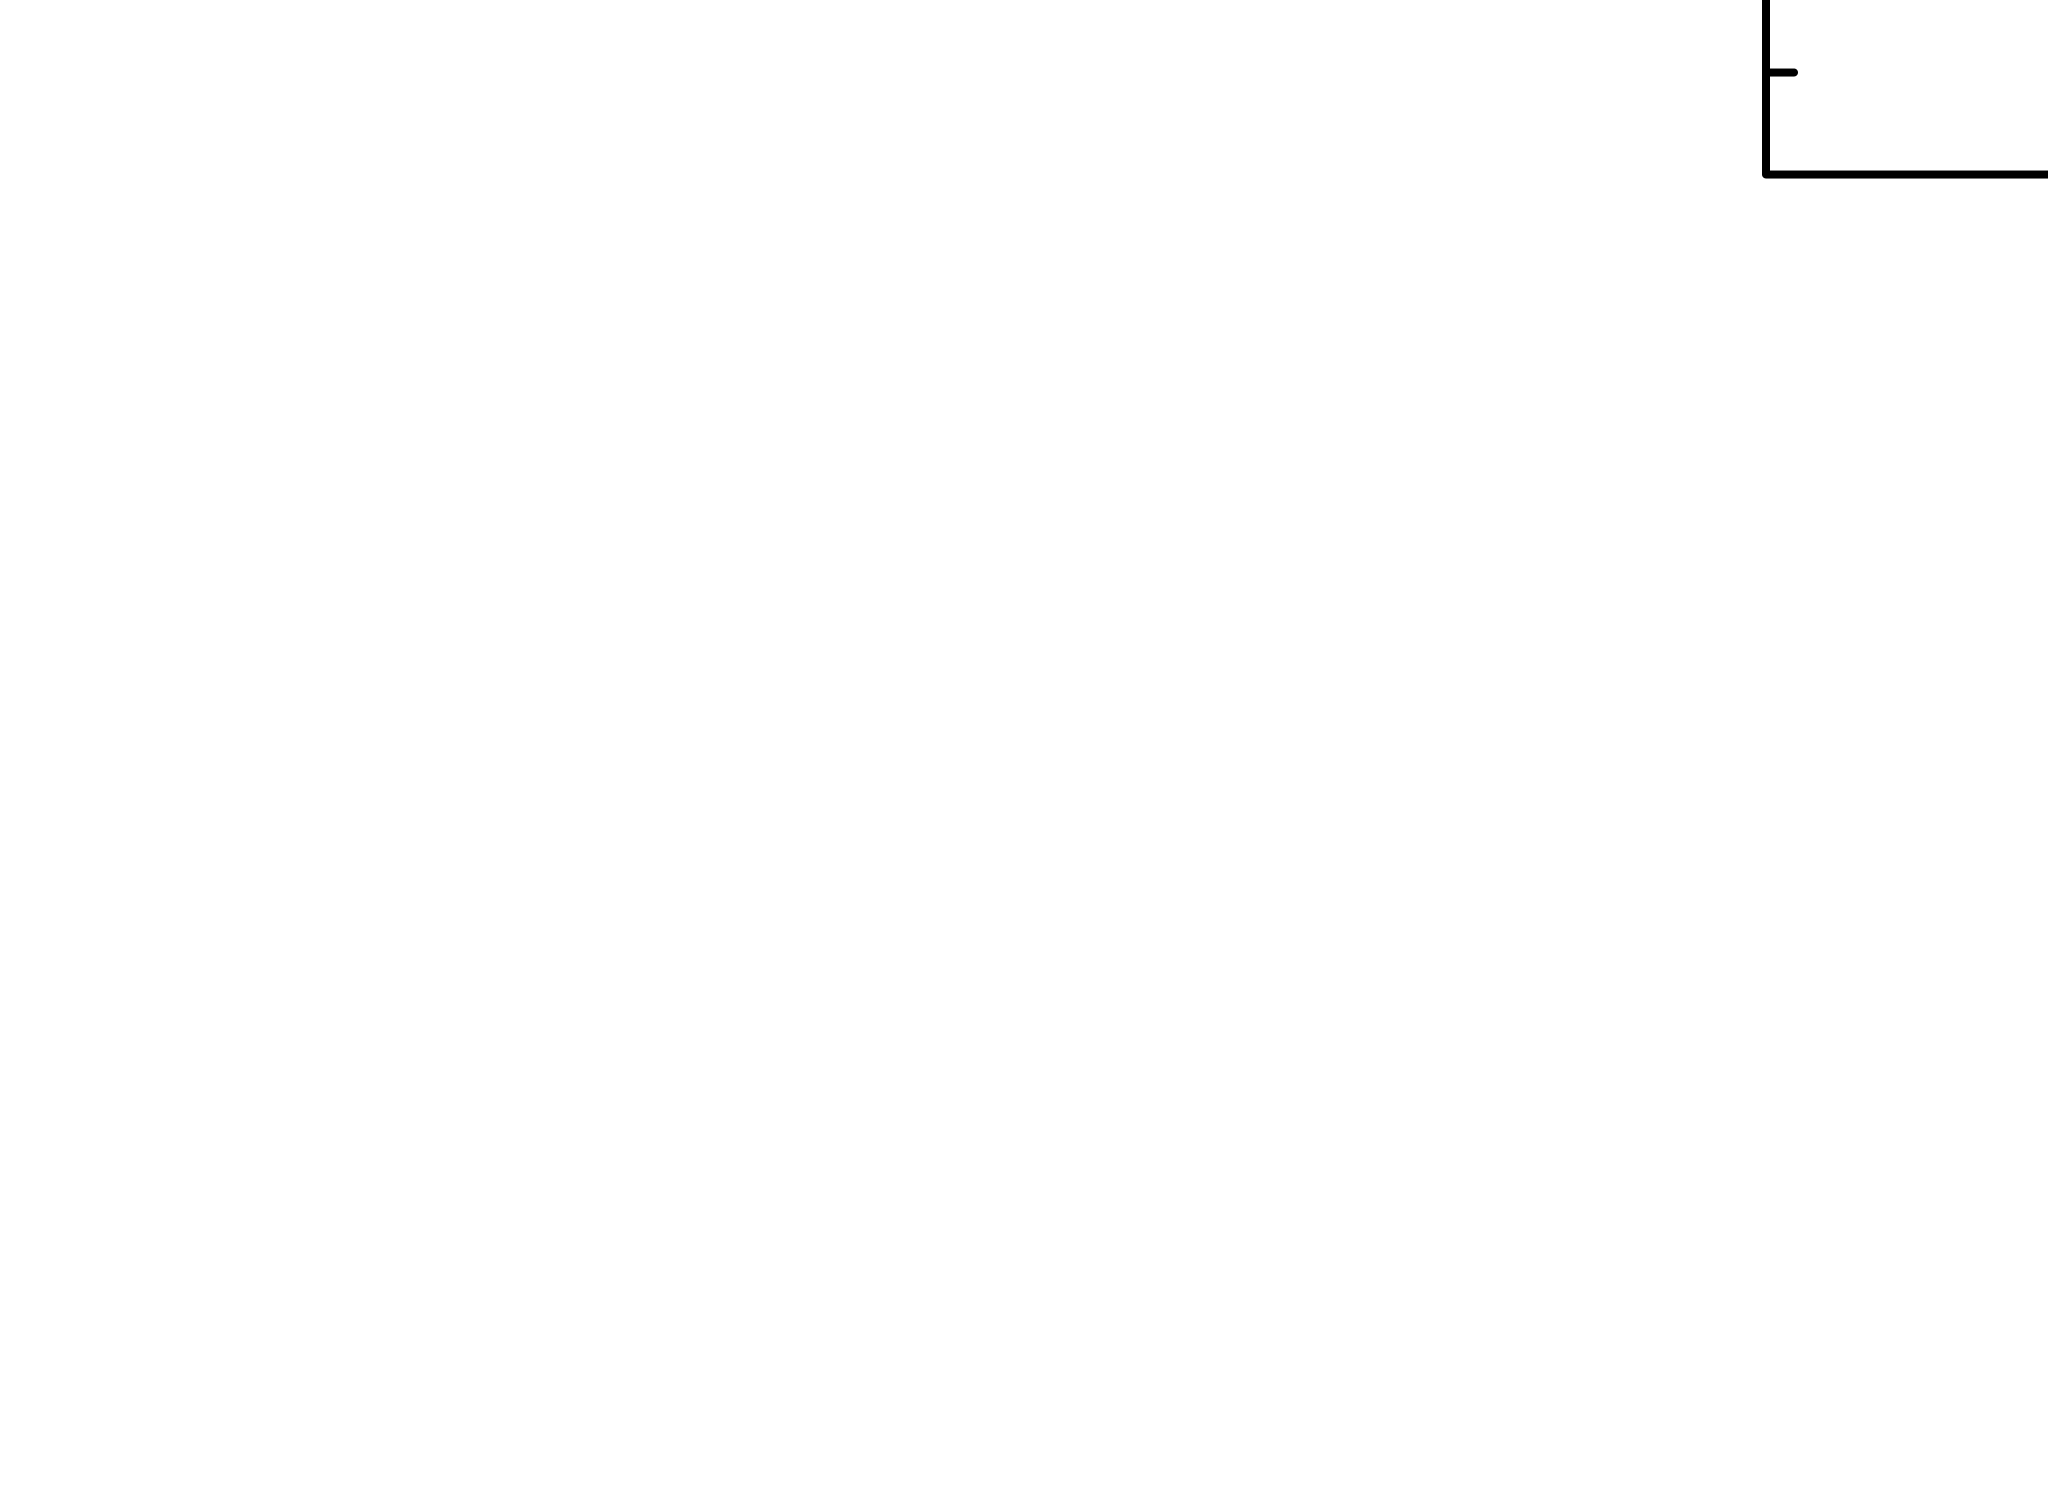

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.459926e+09     using 6 bins.

Test statistic : Chi-Squared              1.459926e+09     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
9.77491      

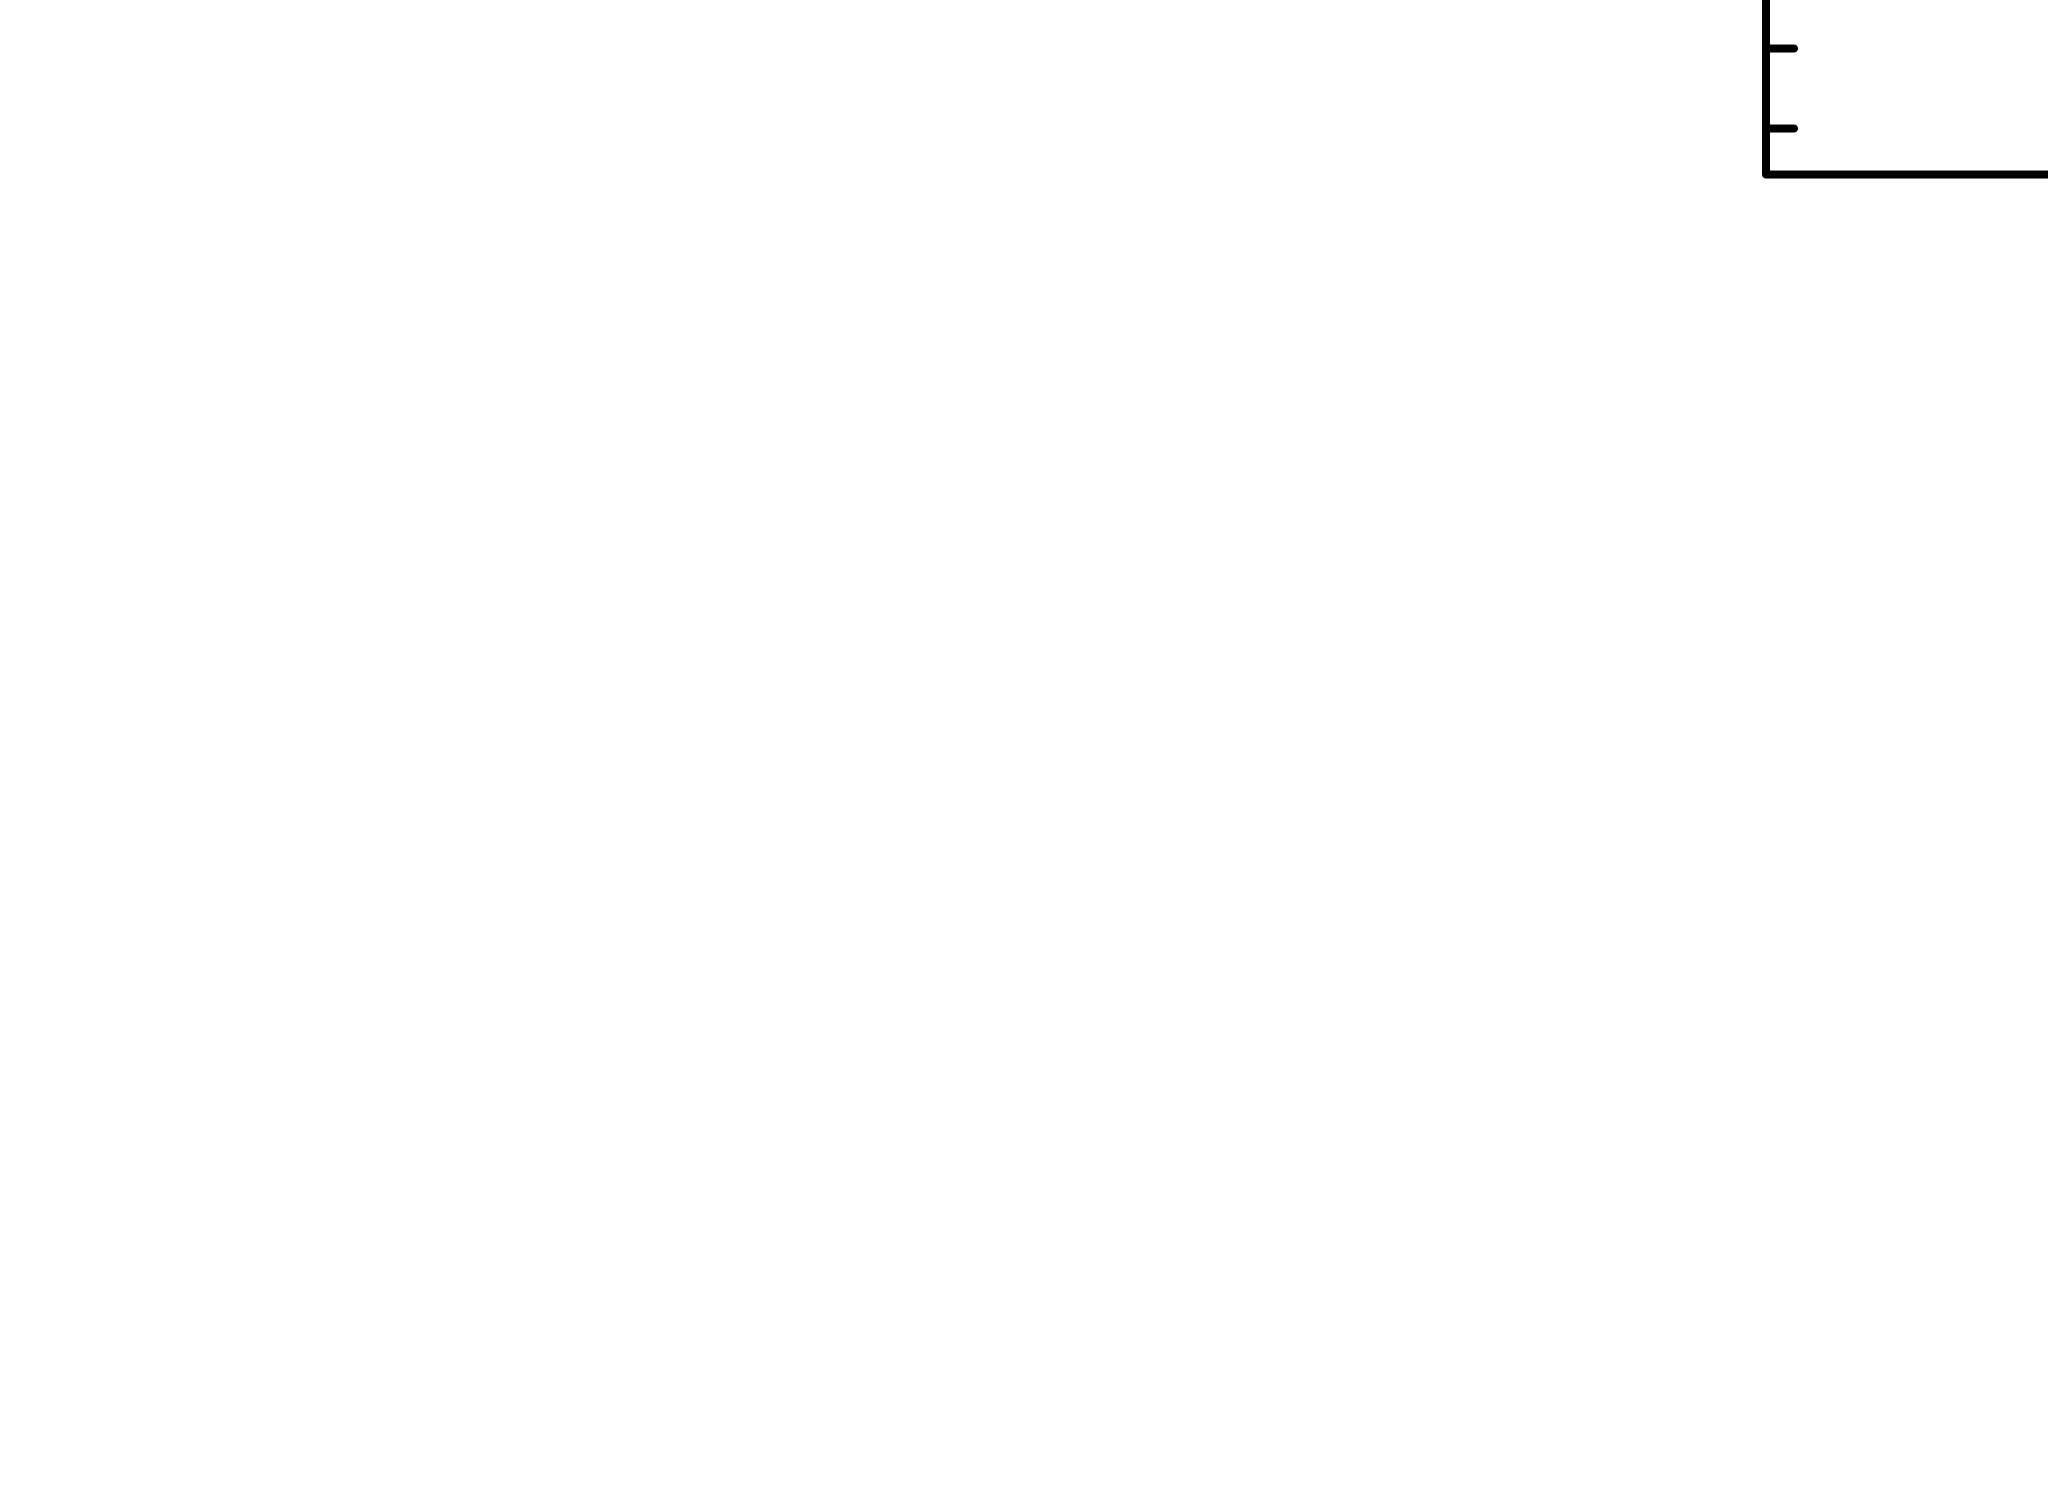

5.42277      -3      0.892778       1.59914   0.000127222
6.18964      24167        -2      0.305392       3.30070   0.000107181
3.04929      6740.92      -3      0.517415       3.12407   0.000154007
2.98329      2245.38      -4      0.538744       3.24181   0.000162168
2.98281      54.0986      -5      0.534784       3.30261   0.000161816
2.98274      0.677771     -6      0.537765       3.27754   0.000162236
 Variances and Principal Axes
                 1        2        5  
 5.9954E-10| -0.0002  -0.0000   1.0000  
 2.8113E-02|  0.9969   0.0784   0.0002  
 5.1931E+00| -0.0784   0.9969  -0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   5.983e-02  -4.035e-01   8.772e-06
  -4.035e-01   5.161e+00  -4.971e-05
   8.772e-06  -4.971e-05   1.922e-09
------------------------------------

Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^2

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")